# Implementation of MCP Neuron for AND and OR Function.

In [1]:
def MCP_Neurons_AND(X1, X2, T=2):
    """
    Implements basic AND operation using MCP Neuron.

    Parameters:
    X1 (list): First binary input array.
    X2 (list): Second binary input array.
    T (int): Threshold value for AND gate (default = 2).

    Returns:
    list: Neuron output state for each input pair.
    """
    assert len(X1) == len(X2)

    state_neuron = []
    for x1, x2 in zip(X1, X2):
        state_neuron.append(1 if (x1 + x2) >= T else 0)

    return state_neuron

# Example usage
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 2
print(f"AND Gate Output: {MCP_Neurons_AND(X1, X2, T)}")


AND Gate Output: [0, 0, 0, 1]


In [2]:
def MCP_Neurons_OR(X1, X2, T=1):
    """
    Implements basic OR operation using MCP Neuron.

    Parameters:
    X1 (list): First binary input array.
    X2 (list): Second binary input array.
    T (int): Threshold value for OR gate (default = 1).

    Returns:
    list: Neuron output state for each input pair.
    """
    assert len(X1) == len(X2)

    state_neuron = []
    for x1, x2 in zip(X1, X2):
        state_neuron.append(1 if (x1 + x2) >= T else 0)

    return state_neuron

# Example usage
T = 1
print(f"OR Gate Output: {MCP_Neurons_OR(X1, X2, T)}")


OR Gate Output: [0, 1, 1, 1]


# Implementation for 0 Vs. 1 Classification.

## Step 1: Load the Dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
df_0_1 = pd.read_csv("/content/mnist_0_and_1.csv")  # Add the correct file path if necessary

# Extract features and labels
X = df_0_1.drop(columns=["label"]).values  # 784 pixels
y = df_0_1["label"].values  # Labels (0 or 1)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)


Feature matrix shape: (12665, 784)
Label vector shape: (12665,)


### Viewing the Dataset.

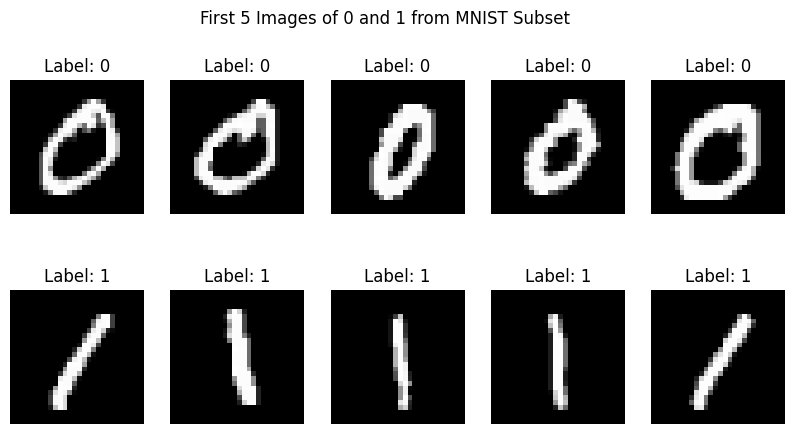

In [6]:
# Separate images for label 0 and label 1
images_0 = X[y == 0]  # Get all images with label 0
images_1 = X[y == 1]  # Get all images with label 1

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have the required amount of data
if len(images_0) < 5 or len(images_1) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 0")
        axes[0, i].axis("off")
        # Plot digit 1
        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 1")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset")
    plt.show()

## Step - 2 - Initializing the Weights:

In [7]:
# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights for each pixel
bias = 0
learning_rate = 0.1
epochs = 100


## Step - 3 - Make a Decision function:

In [8]:
def decision_function(X, weights, bias):
    """
    Computes predictions using the perceptron activation function.

    Parameters:
    X (ndarray): Input feature matrix.
    weights (ndarray): Trained weights.
    bias (float): Bias term.

    Returns:
    ndarray: Predicted labels (0 or 1).
    """
    predictions = np.dot(X, weights) + bias
    return np.where(predictions >= 0, 1, 0)  # Step function


## Step - 3 - Implement the Perceptron Learning Algorithm

In [9]:
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Trains a perceptron using the Perceptron Learning Algorithm.

    Parameters:
    X (ndarray): Feature matrix.
    y (ndarray): Target labels.
    weights (ndarray): Initial weights.
    bias (float): Initial bias.
    learning_rate (float): Learning rate.
    epochs (int): Number of training iterations.

    Returns:
    tuple: Updated weights, updated bias, and accuracy.
    """
    for epoch in range(epochs):
        correct = 0
        for i in range(len(y)):
            output = np.dot(X[i], weights) + bias
            prediction = 1 if output >= 0 else 0

            # Update if misclassified
            if prediction != y[i]:
                weights += learning_rate * (y[i] - prediction) * X[i]
                bias += learning_rate * (y[i] - prediction)
            else:
                correct += 1

        accuracy = correct / len(y)
        print(f"Epoch {epoch+1}/{epochs} - Accuracy: {accuracy:.4f}")

        if accuracy == 1.0:  # Stop early if perfect
            break

    return weights, bias, accuracy

# Train the perceptron
weights, bias, accuracy = train_perceptron(X, y, weights, bias)
print("Final Accuracy:", accuracy)


Epoch 1/100 - Accuracy: 0.9967
Epoch 2/100 - Accuracy: 0.9982
Epoch 3/100 - Accuracy: 0.9987
Epoch 4/100 - Accuracy: 0.9987
Epoch 5/100 - Accuracy: 0.9990
Epoch 6/100 - Accuracy: 0.9993
Epoch 7/100 - Accuracy: 0.9998
Epoch 8/100 - Accuracy: 0.9995
Epoch 9/100 - Accuracy: 0.9989
Epoch 10/100 - Accuracy: 0.9992
Epoch 11/100 - Accuracy: 0.9995
Epoch 12/100 - Accuracy: 0.9998
Epoch 13/100 - Accuracy: 1.0000
Final Accuracy: 1.0


## Training the Perceptron

In [10]:
import matplotlib.pyplot as plt

# Get predictions
y_pred = decision_function(X, weights, bias)

# Identify misclassified indices
misclassified_idx = np.where(y_pred != y)[0]

if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))

    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")

    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")


All images were correctly classified!


## Step 5: Visualize Misclassified Images

Epoch 1/100 - Accuracy: 0.0000
Epoch 2/100 - Accuracy: 0.0000
Epoch 3/100 - Accuracy: 0.0000
Epoch 4/100 - Accuracy: 0.0000
Epoch 5/100 - Accuracy: 0.0000
Epoch 6/100 - Accuracy: 0.0000
Epoch 7/100 - Accuracy: 0.0000
Epoch 8/100 - Accuracy: 0.0000
Epoch 9/100 - Accuracy: 0.0000
Epoch 10/100 - Accuracy: 0.0000
Epoch 11/100 - Accuracy: 0.0000
Epoch 12/100 - Accuracy: 0.0000
Epoch 13/100 - Accuracy: 0.0000
Epoch 14/100 - Accuracy: 0.0000
Epoch 15/100 - Accuracy: 0.0000
Epoch 16/100 - Accuracy: 0.0000
Epoch 17/100 - Accuracy: 0.0000
Epoch 18/100 - Accuracy: 0.0000
Epoch 19/100 - Accuracy: 0.0000
Epoch 20/100 - Accuracy: 0.0000
Epoch 21/100 - Accuracy: 0.0000
Epoch 22/100 - Accuracy: 0.0000
Epoch 23/100 - Accuracy: 0.0000
Epoch 24/100 - Accuracy: 0.0000
Epoch 25/100 - Accuracy: 0.0000
Epoch 26/100 - Accuracy: 0.0000
Epoch 27/100 - Accuracy: 0.0000
Epoch 28/100 - Accuracy: 0.0000
Epoch 29/100 - Accuracy: 0.0000
Epoch 30/100 - Accuracy: 0.0000
Epoch 31/100 - Accuracy: 0.0000
Epoch 32/100 - Ac

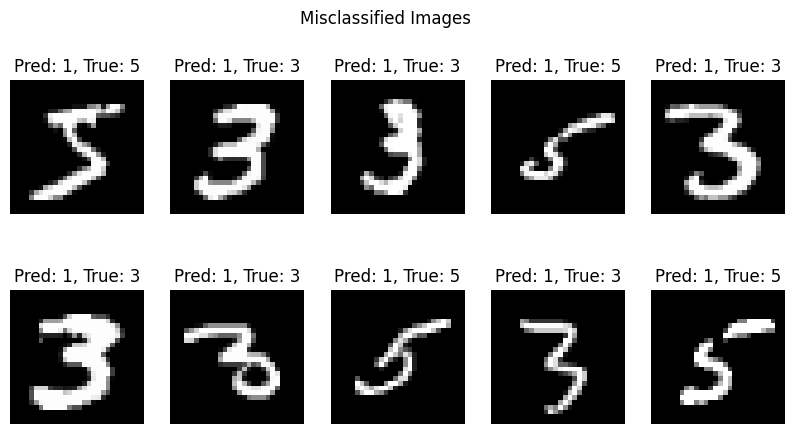

In [12]:
df_3_5 = pd.read_csv("/content/mnist_3_and_5.csv")  # Load dataset

X = df_3_5.drop(columns=["label"]).values
y = df_3_5["label"].values

# Train the perceptron
weights, bias, accuracy = train_perceptron(X, y, weights, bias)
print("Final Accuracy on 3 vs 5:", accuracy)

# Visualize misclassified images
y_pred = decision_function(X, weights, bias)
misclassified_idx = np.where(y_pred != y)[0]

if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))

    for ax, idx in zip(axes.flat, misclassified_idx[:10]):
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")

    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")
